In [74]:
import sqlite3
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.tools import eval_measures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [75]:
# load in merged_citylevel_data
file = "../data/csv/merged_citylevel_data.csv"
merged_df = pd.read_csv(file)
merged_df
# for col in merged_df.columns:
#     print(col)

,city,percent_millenial,total_population,per_cap_consumption,per_cap_dollar_sales,units_current_year,dollars_current_year,asp_current_year,year
0,Albany,22.0,"97,726",56.464359,77.465250,5.518036e+06,7.570369e+06,1.383631,2017
1,Atlanta,26.0,"491,763",57.869124,73.631820,2.845789e+07,3.620940e+07,1.284721,2017
2,Baltimore/Washington,23.0,"693,972",64.454312,94.508561,4.472949e+07,6.558630e+07,1.469946,2017
3,Boise,26.0,"227,621",19.203173,26.754134,4.371045e+06,6.089803e+06,1.400174,2017
4,Boston,23.0,688276,44.897423,67.174874,3.090182e+07,4.623485e+07,1.503295,2017
5,Buffalo/Rochester,26.1,"206,483",41.017719,58.333023,8.469462e+06,1.204478e+07,1.416024,2017
6,Charlotte,25.0,"859,347",14.553037,20.668500,1.250611e+07,1.776141e+07,1.429049,2017
7,Chicago,24.0,2713000,15.943954,24.600782,4.325595e+07,6.674192e+07,1.586561,2017
8,Cincinnati/Dayton,26.0,"301,648",44.899463,61.883576,1.354383e+07,1.866706e+07,1.398234,2017
9,Columbus,29.0,"881,763",11.384823,13.783786,1.003872e+07,1.215403e+07,1.229467,2017


In [76]:
# merged_df.plot.bar(x='city', y='percent_millenial')
# merged_df.plot.bar(x='city', y='per_cap_consumption')

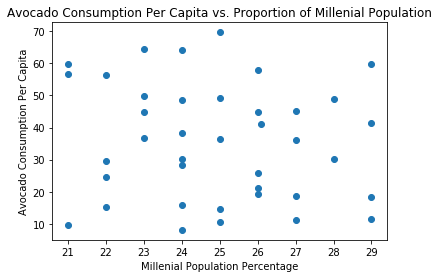

In [80]:
# remove outliers
outliers = ["Harrisburg/Scranton", "Miami/FT. Lauderdale"]
merged_df = merged_df[~merged_df['city'].isin(outliers)]
merged_df

millenial_percent = merged_df['percent_millenial']
avo_cap = merged_df['per_cap_consumption']
plt.scatter(millenial_percent, avo_cap)
plt.title("Avocado Consumption Per Capita vs. Proportion of Millenial Population")
plt.xlabel("Millenial Population Percentage")
plt.ylabel("Avocado Consumption Per Capita")
plt.show()

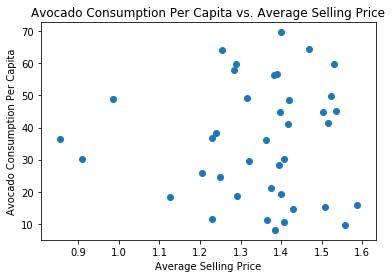

In [81]:
price = merged_df['asp_current_year']
avo_cap = merged_df['per_cap_consumption']
plt.scatter(price, avo_cap)
plt.title("Avocado Consumption Per Capita vs. Average Selling Price")
plt.xlabel("Average Selling Price")
plt.ylabel("Avocado Consumption Per Capita")
plt.show()

In [82]:
# X = merged_df[['percent_millenial']]
# X = merged_df[['percent_millenial', 'asp_current_year']]
X = merged_df[['percent_millenial', 'asp_current_year']]
y = merged_df['per_cap_consumption']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     per_cap_consumption   R-squared:                       0.019
Model:                             OLS   Adj. R-squared:                 -0.036
Method:                  Least Squares   F-statistic:                    0.3413
Date:                 Mon, 04 May 2020   Prob (F-statistic):              0.713
Time:                         11:55:35   Log-Likelihood:                -167.21
No. Observations:                   39   AIC:                             340.4
Df Residuals:                       36   BIC:                             345.4
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                71.5907